## 1.数据来源
[Kesci](https://www.kesci.com/home/dataset/5f1e3fde94d484002d2f6715) 小红书的历史销售记录

### 字段名称
Revenue: 用户下单的购买金额  
3rd_party_stores: 用户过往在app中从第三方购买的数量，为0则代表只在自营商品中购买  
Gender: 性别 1：男 0：女 未知则空缺  
Engaged_last_30: 最近30天在app上有参与重点活动（讨论，卖家秀）  
Lifecycle: 生命周期分为A,B,C （分别对应注册6个月内，1年内，2年内）  
days_since_last_order: 最近一次下单距今的天数 （小于1则代表当天有下单）  
previous_order_amount: 以往累积的用户购买金额  

## 2.分析目的
    小红书是中国知名的网络购物和社交平台，它的社区经营模式是目前做的最棒的。

### 分析结果
    1.小红书的社区模式十分成功，曾经参与过活动的人总体消费会比没参与过的高出68.0%，鼓励客户分享自己的体验会成为良好的循环。  
    2.小红书主要的营收都来自于40-70的中老年人，（需要复核）那么应该更多为中老年人提供相应增值服务，如增加朗读功能及增大字号等功能。  
    3.男性的平均消费金额比女性高835.4元，不过总消费人数仅为女性的1/21。很有可能是因为男性相比更少分享自己的购物经历（亲身体验得知），导致男性消费人数过低，为男性购买用户发送分享经历的消费券可能会有作用（需要A/BTest），也需要总注册人数的进一步数据分析。  
    4.在查看了各个年龄，和性别中ABC客户群体所占比例后可以了解，并不存在某些年龄或者性别特别低，就是总体流量减少导致消费减少。  
    5.最近一个月每天的消费人数都在上涨，不过只有C群体每日都有消费记录，B群体仅有最近5天，C群体仅有最近两天。  

## 3.数据导入与清洗
- 空值的检查与处理  
- 重复值的检查与处理  
- 异常值的检查与处理  
- 数据类型的检查与调整  


In [1]:
#导入依赖的第三方包
import pandas as pd 
import numpy as np 
#加载数据可视化包 
import matplotlib.pyplot as plt
import time
#可视化显示在页面 jupyter专属 %内置
%matplotlib inline
#更改设计风格
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
#读取数据
data = pd.read_csv('31 l2_week2.csv')
data.head()

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4


In [3]:
#查看是否存在重复值
data.duplicated().sum()

1

In [4]:
#删除重复值
data = data.drop_duplicates()

In [5]:
#检测是否存在空值
data.isnull().sum()

revenue                        0
gender                     11728
age                        12735
engaged_last_30            11728
lifecycle                      0
 days_since_last_order         0
previous_order_amount          0
3rd_party_stores               0
dtype: int64

In [6]:
#有相当多的数据为空值，可能是数据收集或者存储过程出现问题，需要复查，此处直接删除
data.dropna(inplace=True)

In [7]:
#数据格式概览
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16716 entries, 0 to 29450
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   revenue                  16716 non-null  float64
 1   gender                   16716 non-null  float64
 2   age                      16716 non-null  float64
 3   engaged_last_30          16716 non-null  float64
 4   lifecycle                16716 non-null  object 
 5    days_since_last_order   16716 non-null  float64
 6   previous_order_amount    16716 non-null  float64
 7   3rd_party_stores         16716 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [8]:
#将数据按照年龄进行分组
listbins=[0,20,30,40,50,60,70,80,90,100]
listlabel=['20以下','20-39','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
data['age_group']=pd.cut(data['age'],bins=listbins,labels=listlabel,right=False,include_lowest = True)
#购买天数规整为1天，便于分析
data[' days_since_last_order '] = data[' days_since_last_order '].apply(lambda x:round(x,0))
data.head()

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores,age_group
0,72.98,1.0,59.0,0.0,B,4.0,2343.870,0,50-59
1,200.99,1.0,51.0,0.0,A,1.0,8539.872,0,50-59
2,69.98,1.0,79.0,0.0,C,4.0,1687.646,1,70-79
5,319.99,1.0,80.0,0.0,C,15.0,2811.491,10,80-89
6,140.00,1.0,60.0,0.0,C,11.0,769.990,4,60-69


In [9]:
#保存清洗后的数据
data.to_csv("data_cleaned.csv")

## 4.数据分析
1. 社区营销是否有作用
2. 各年龄的人在小红书的购买记录
3. 不同性别的人在小红书的购买记录
4. 不同生命周期的人在小红书的购买记录
5. 第三方店铺对小红书的影响
6. 各生命周期年龄性别顾客占比
7. 各生命周期每日消费记录

### 4.1小红书社区营销分析

In [10]:
#过去30天内有参与重点活动的人收入
engaged_last_30_mean = data.pivot_table(index='engaged_last_30',values=['previous_order_amount','revenue'],aggfunc='mean')
engaged_last_30_mean

,previous_order_amount,revenue
engaged_last_30,,
0.0,2463.216141,362.080838
1.0,4139.682919,551.065712


In [11]:
print("参与活动的人消费总金额比不参与活动的人高出多少",(engaged_last_30_mean.iloc[1,0] - engaged_last_30_mean.iloc[0,0])/ engaged_last_30_mean.iloc[0,0])
print("参与活动的人近期消费金额比不参与活动的人高出多少",(engaged_last_30_mean.iloc[1,1] - engaged_last_30_mean.iloc[0,1])/ engaged_last_30_mean.iloc[0,1])

参与活动的人消费总金额比不参与活动的人高出多少 0.6806007598334421
参与活动的人近期消费金额比不参与活动的人高出多少 0.5219411111524759


**结论1：** 小红书目前以社区为基础的政策非常成功，参与过活动的人会比未参与过的人消费更多金额。

### 4.2小红书购买记录分析

In [24]:
#数据概览
data.describe()

,revenue,gender,age,engaged_last_30,days_since_last_order,previous_order_amount,3rd_party_stores
count,16716.000000,16716.000000,16716.000000,16716.000000,16716.000000,16716.000000,16716.000000
mean,375.206672,0.956090,60.397404,0.069454,7.245992,2579.654161,1.980797
std,624.980897,0.204901,14.823026,0.254233,6.224317,2490.505233,3.266843
min,0.020000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,71.942500,1.000000,50.000000,0.000000,2.000000,903.620250,0.000000
50%,164.980000,1.000000,60.000000,0.000000,6.000000,1852.945000,0.000000
75%,479.990000,1.000000,70.000000,0.000000,11.000000,3394.950000,3.000000
max,29080.800000,1.000000,99.000000,1.000000,24.000000,11597.900000,10.000000


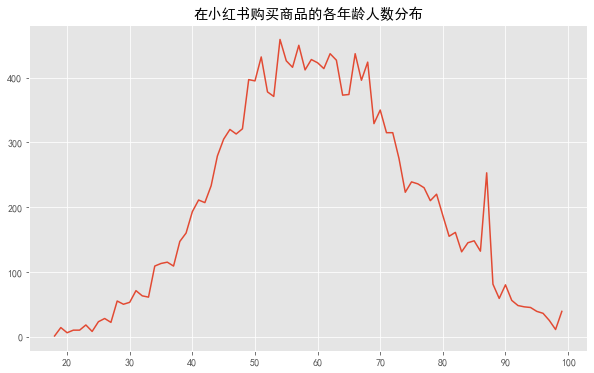

In [13]:
#在小红书购买商品的各年龄人数占比
plt.figure(figsize=(10,6))
data.age.value_counts().sort_index().plot()
plt.title("在小红书购买商品的各年龄人数分布")
plt.show()

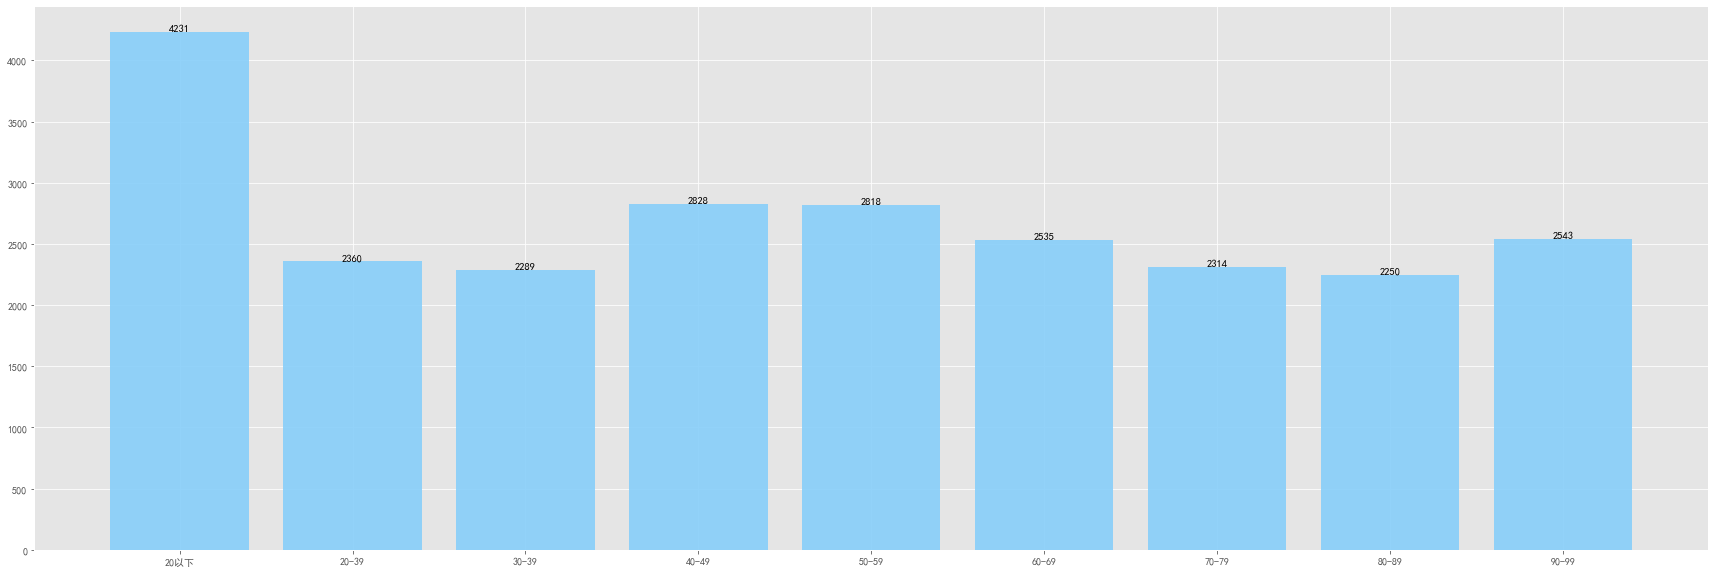

In [14]:
#各年龄历史购买总额价格平均值
ag_df =data.groupby("age_group")['previous_order_amount'].mean().sort_index()

plt.figure(figsize=(30,10))
plt.bar(x=ag_df.index.tolist(),height=np.round(ag_df.values,2).tolist(),alpha=0.9,color='#87CEFA')
for x, y in zip(ag_df.index, ag_df.values):
    plt.text(x, y, '%.0f'%y, ha='center', va='bottom', fontsize=10.5)
plt.show()



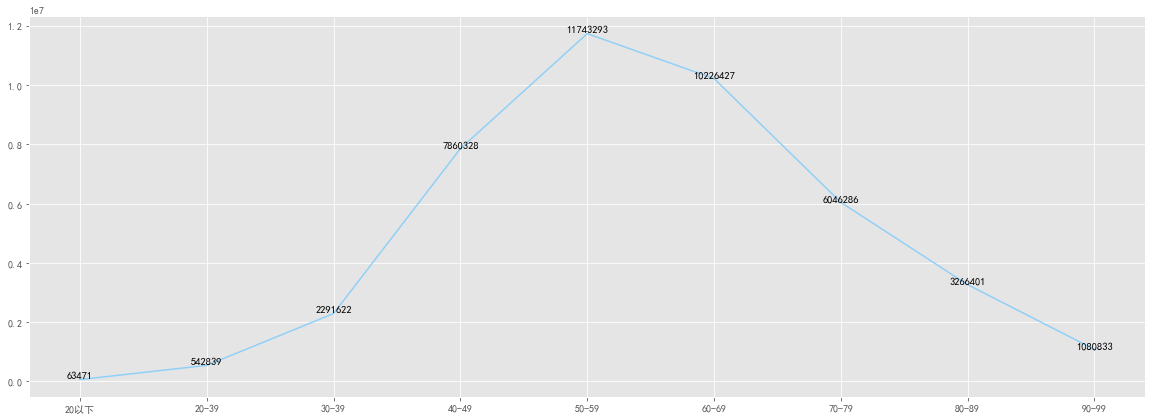

In [15]:
#各年龄历史购买总额
ag_sum_df =data.groupby("age_group")['previous_order_amount'].sum().sort_index()

plt.figure(figsize=(20,7))
plt.plot(ag_sum_df,alpha=0.9,color='#87CEFA')
for x, y in zip(ag_sum_df.index, ag_sum_df.values):
    plt.text(x, y, '%.0f'%y, ha='center', va='bottom', fontsize=10.5)
plt.show()


**综述：**  
1.在小红书购物的人是以平均数为60的正太分布。  
2.各年龄段在小红书历史购买金额均值差距不大，除了分组20岁以下的远超其他分组，原因是数据过少导致的失真。

**结论2：** 小红书的消费用户和主要营收都来自40岁-70岁的中老年人。

上面的结论与刻板印象（使用小红书的大多是20-30的年轻人）正相反。目前猜测有三个可能：  
1.用户偏向于填写虚假年龄，导致平均年龄偏大。  
2.用户分布与消费分布一致，确实是中老年人占绝对多数，印象有偏差。  
3.用户确实大多数是20-30居多，但他们的消费能力与意愿并没有40-70岁的人强烈。

In [16]:
#小红书男女消费人数比
gender_total = data.pivot_table(values='age',index = 'gender',aggfunc='count')
gender_total.index=['男','女']
gender_total
print("男/女消费人数比",gender_total.iloc[1,0]/gender_total.iloc[0,0])

男/女消费人数比 21.77384196185286


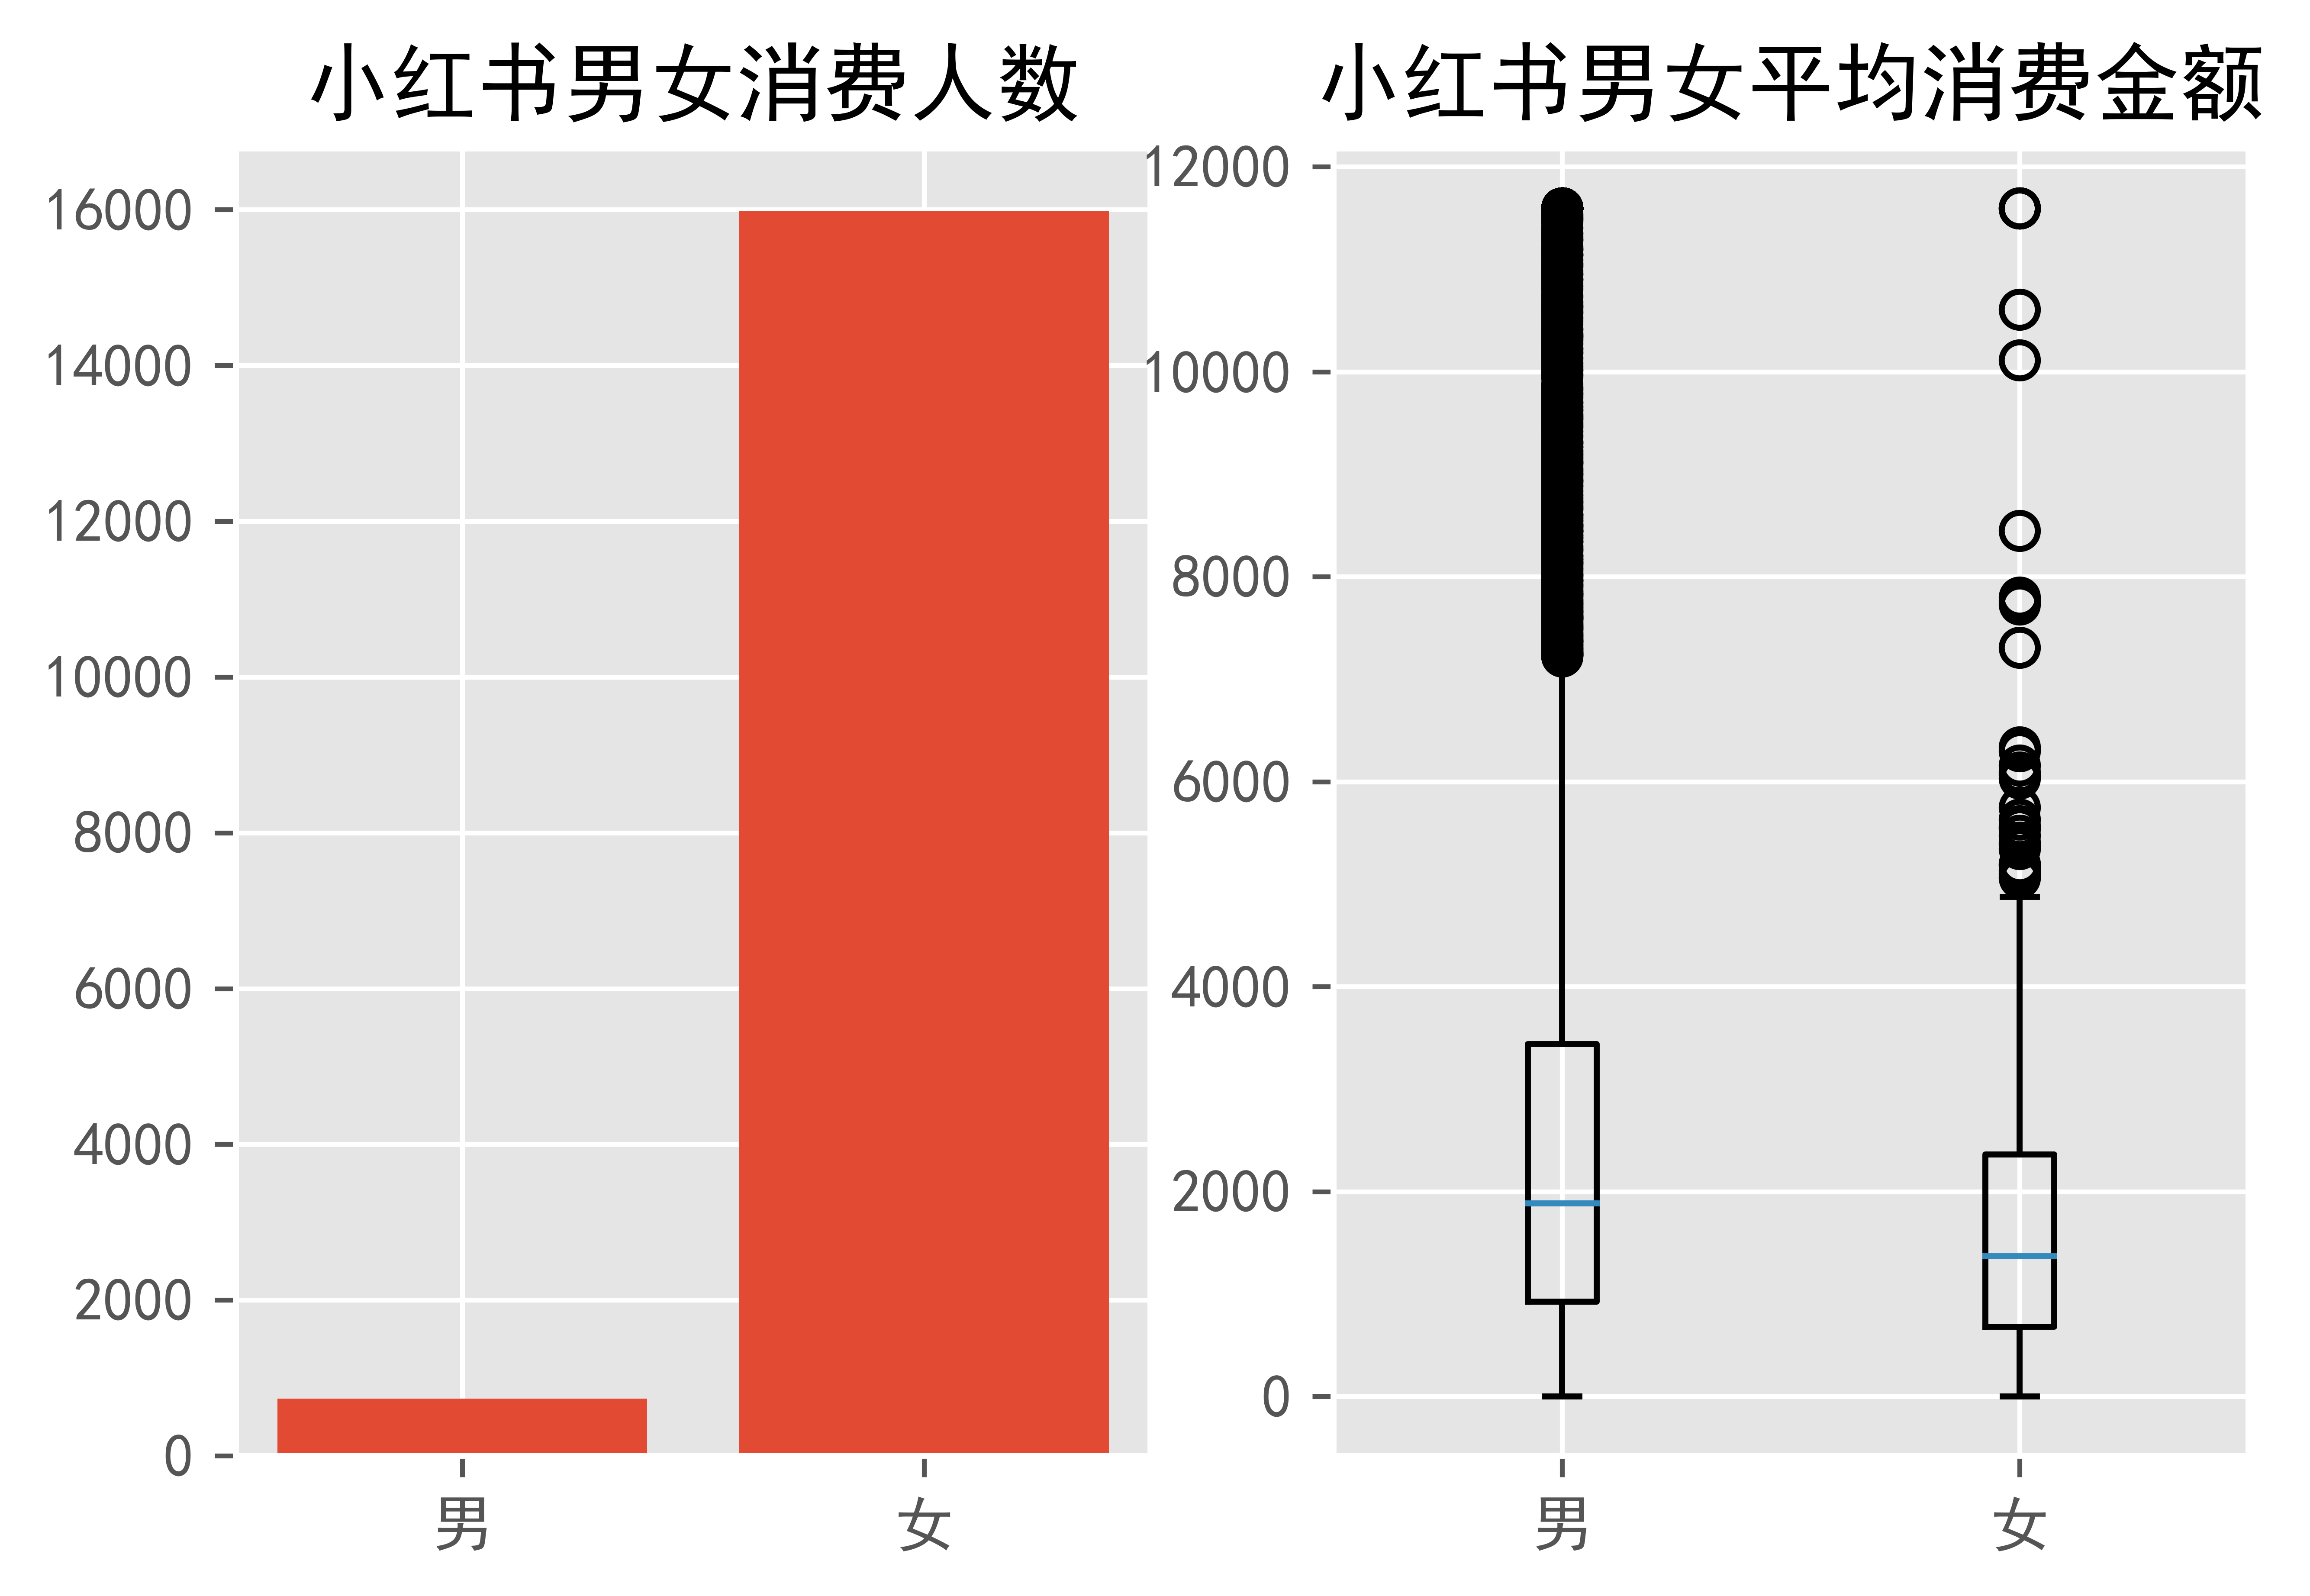

In [17]:
#小红书男女消费人数机器平均消费金额
fig = plt.figure(dpi=1000)

ax1=fig.add_subplot(1,2,1)
plt.bar(x=gender_total.index,height=gender_total['age'])
plt.title("小红书男女消费人数")

ax2=fig.add_subplot(1,2,2)
labels = ['男','女']
box1,box2=[data[data.gender == 1]['previous_order_amount'],data[data.gender == 0]['previous_order_amount']]
plt.boxplot([box1,box2],labels=labels)
plt.title("小红书男女平均消费金额")
plt.show()

**结论3：** 女性顾客的数量远远大于男性，是男性的21倍，男性顾客的平均购买金额远超女性，这说明  
男性比女性更容易购买更多的东西，女性在此消费意愿远远超过男性。

### 4.3小红书各生命周期人数占比

In [18]:
#各个生命周期人数比
age_percent = data.pivot_table(values='age',index = 'lifecycle',aggfunc='count')
#各个生命周期总消费金额比
income_total = data.pivot_table(values='previous_order_amount',index = 'lifecycle',aggfunc=np.sum)
#用户各个生命周期参与活动比例
customer_total = data.pivot_table(values=['3rd_party_stores','engaged_last_30'],index = 'lifecycle',aggfunc={'3rd_party_stores':'count','engaged_last_30':np.sum})

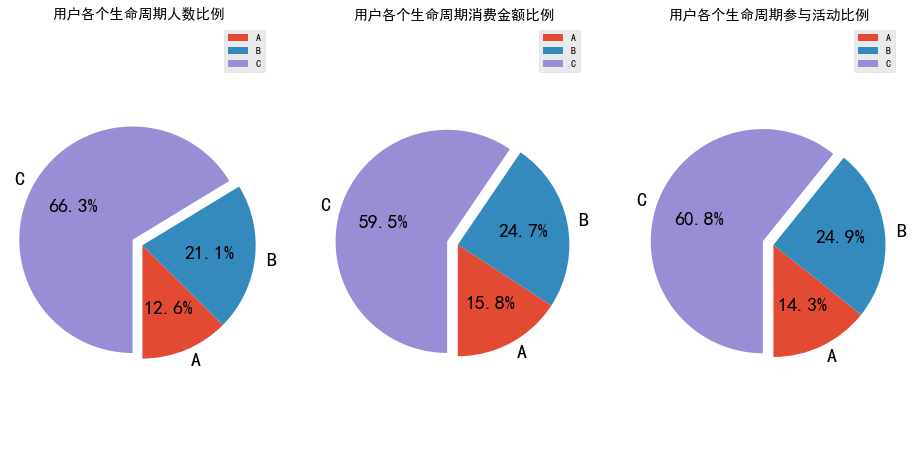

In [19]:

plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
explode=[0,0,0.1] 
labels =['A','B','C']
patches,l_text,p_text = plt.pie(age_percent['age'],
       autopct='%3.1f%%',
       labels = labels,
       pctdistance=0.6,
       labeldistance = 1.1,
       radius=1,
       startangle = 270,
             explode = explode)

for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(20)
    
    
plt.axis('equal')
plt.legend()
plt.title("用户各个生命周期人数比例")

plt.subplot(1,3,2)
patches,l_text,p_text = plt.pie(income_total['previous_order_amount'],
       autopct='%3.1f%%',
       labels = labels,
       pctdistance=0.6,
       labeldistance = 1.1,
       radius=1,
       startangle = 270,
       explode = explode)

for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(20)
    
    
plt.axis('equal')
plt.legend()
plt.title("用户各个生命周期消费金额比例")

plt.subplot(1,3,3)
patches,l_text,p_text = plt.pie(customer_total['engaged_last_30'],
       autopct='%3.1f%%',
       labels = labels,
       pctdistance=0.6,
       labeldistance = 1.1,
       radius=1,
       startangle = 270,
       explode = explode)

for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(20)
    
    
plt.axis('equal')
plt.legend()
plt.title("用户各个生命周期参与活动比例")

plt.show()

**结论4：** 入站时间更长的人（即，lifefycle在C的人）不仅人数更多，消费总金额也更多。  
新注册的用户（A、B)的最近消费的数量远小于老用户（C）,并且用户活跃数量（最近30天有参加讨论数量）也远远不如。  
不过各项指标所占的比例大致相同，这说明**新注册用户这段时间消费人数的减少是根本原因**

In [20]:
#各个生命周期在第三方消费的比例
thirdparties_total = data.pivot_table(values='3rd_party_stores',index = 'lifecycle',aggfunc=np.sum)
thirdparties_total

,3rd_party_stores
lifecycle,
A,0
B,0
C,33111


**结论4：** 新客户更倾向于在自营店铺消费，C还是有很多的人会在第三方店铺消费，对于小红书来说肯定是自营更加赚钱且易于管理。不过第三方店铺的购入为0，这是较为反常的现象，可能这也是导致新购买用户逐渐减少的原因之一。

PS：如果要分析小红书对新用户第三方店铺的相关政策有何影响还需要更多有关总注册人群以及更长时间的消费数据。

### 4.4 小红书各生命周期人群细分

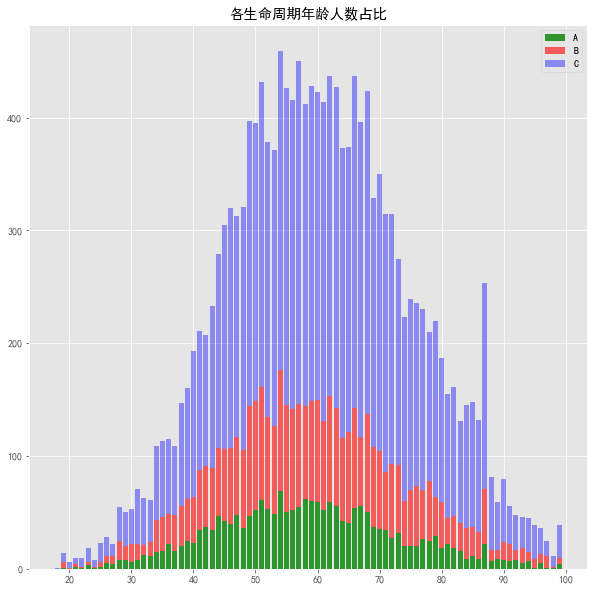

In [21]:
#各生命周期年龄人数占比
life_age = data.pivot_table(index='age',values='revenue',columns='lifecycle',aggfunc='count')
life_age.fillna(0,inplace=True)

fig = plt.figure(figsize=(10,10))
plt.bar(life_age.index,life_age['A'],color='green',label='A',alpha=0.8)
plt.bar(life_age.index,life_age['B'],bottom=life_age['A'],color='red',label='B',alpha=0.6)
plt.bar(life_age.index,life_age['C'],bottom=life_age['A']+life_age['B'],color='blue',label='C',alpha=0.4)
plt.legend()
plt.title("各生命周期年龄人数占比")
plt.show()

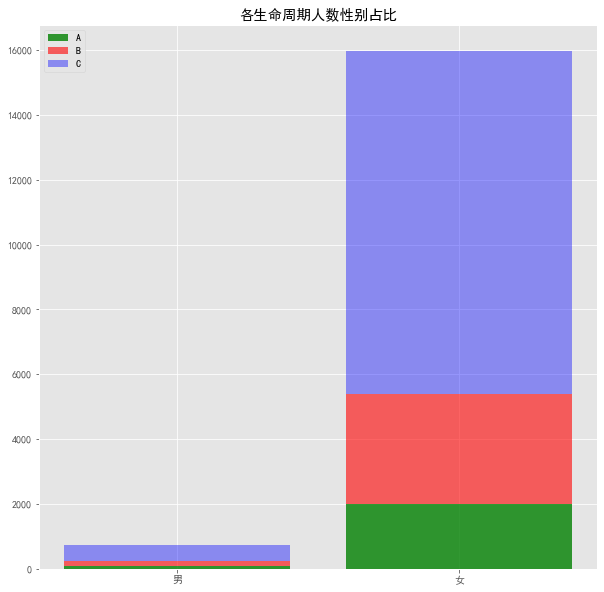

In [22]:
#各生命周期人数性别占比
life_gender = data.pivot_table(index='gender',values='revenue',columns='lifecycle',aggfunc='count')
life_gender.fillna(0,inplace=True)
life_gender.index=['男','女']

fig = plt.figure(figsize=(10,10))
plt.bar(life_gender.index,life_gender['A'],color='green',label='A',alpha=0.8)
plt.bar(life_gender.index,life_gender['B'],bottom=life_gender['A'],color='red',label='B',alpha=0.6)
plt.bar(life_gender.index,life_gender['C'],bottom=life_gender['A']+life_gender['B'],color='blue',label='C',alpha=0.4)
plt.legend()
plt.title("各生命周期人数性别占比")
plt.show()

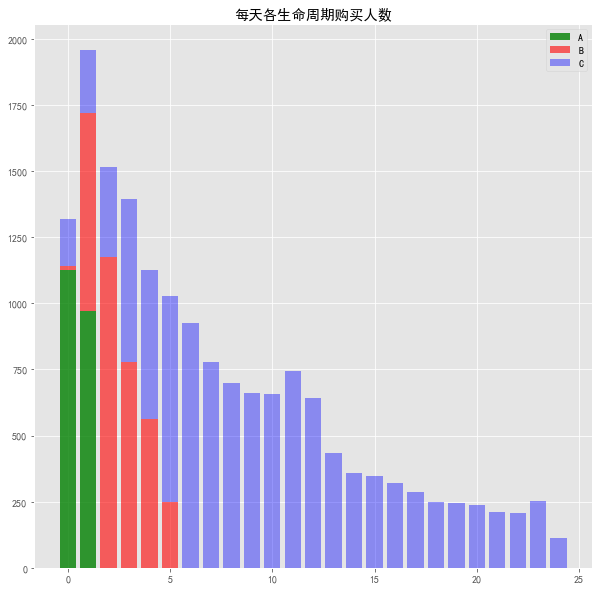

In [23]:
#每天各生命周期购买人数
day_buy = data.pivot_table(index=' days_since_last_order ',values='revenue',columns='lifecycle',aggfunc='count')
day_buy.fillna(0,inplace=True)

fig = plt.figure(figsize=(10,10))
plt.bar(day_buy.index,day_buy['A'],color='green',label='A',alpha=0.8)
plt.bar(day_buy.index,day_buy['B'],bottom=day_buy['A'],color='red',label='B',alpha=0.6)
plt.bar(day_buy.index,day_buy['C'],bottom=day_buy['A']+day_buy['B'],color='blue',label='C',alpha=0.4)
plt.legend()
plt.title("每天各生命周期购买人数")
plt.show()

**结论5：** 在查看了各个年龄，和性别中ABC客户群体所占比例后可以了解，并不存在某些年龄或者性别特别低，就是总体流量减少导致消费减少。

## 总结
    1.小红书的社区模式十分成功，曾经参与过活动的人总体消费会比没参与过的高出68.0%，鼓励客户分享自己的体验会成为良好的循环。
    2.小红书主要的营收都来自于40-70的中老年人，（需要复核）那么应该更多为中老年人提供相应增值服务，如增加朗读功能及增大字号等功能。
    3.男性的平均消费金额比女性高835.4元，不过总消费人数仅为女性的1/21。很有可能是因为男性相比更少分享自己的购物经历（亲身体验得知），导致男性消费人数过低，为男性购买用户发送分享经历的消费券可能会有作用（需要A/BTest），也需要总注册人数的进一步数据分析。
    4.在查看了各个年龄，和性别中ABC客户群体所占比例后可以了解，并不存在某些年龄或者性别特别低，就是总体流量减少导致消费减少。
    5.最近一个月每天的消费人数都在上涨，不过只有C群体每日都有消费记录，B群体仅有最近5天，C群体仅有最近两天。有数据损坏的可能性，需同比上月销售数据。